In [1]:
'''Packages Import'''
# Basic Data Handling
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Statsmodels - Statistics

# Scikit-learn - Machine Learning

# Custom
from config import *
from util import *
from model import *

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

Output Cleaning & Datasets Loading

In [2]:
delete_files(path=OUTPUT_PATH, exception=STATIC_FNAME)
df = download_file(url=DOWNLOAD_URL, unzip='Y', output=OUTPUT_PATH, dt_col=['Date'])
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.096358,8.106


Exploratory Data Analysis (EDA)

Basic Infor: shape, type & missing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Based on the above:
1. 6435 records, with 8 columns;
2. No missing values; 
3. Data type looks reasonable.

Univariate Analysis

1. Categorical Variable

,Variable,Type,Records,Unique,Mean,Std,Median,Pctile_25,Pctile_75,Chi-square,P-value,Conclusion
0,Date,Categorical,6435,143,45.0,0.00,45.0,45.00,45.00,0.00,1.0,Uniformly distributed
1,Store,Categorical,6435,45,143.0,0.00,143.0,143.00,143.00,0.00,1.0,Uniformly distributed
2,Holiday_Flag,Categorical,6435,2,3217.5,3913.84,3217.5,1833.75,4601.25,4760.87,0.0,Imbalanced


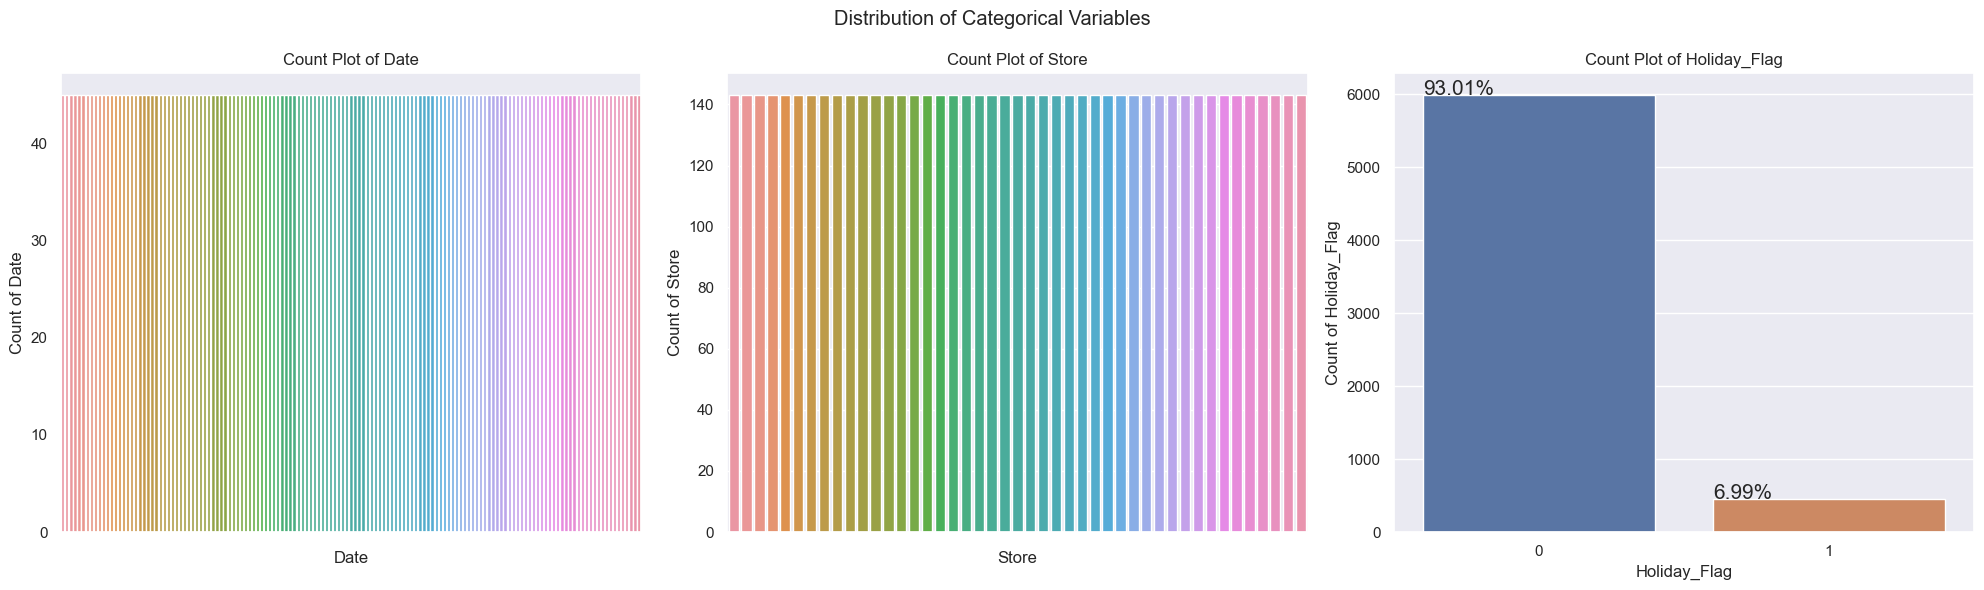

In [4]:
res_catex_vars = vars_dist(df=df, catex=True, ft_catex=FEATURE_CAT, subplots=[1,3], figsize=(20,6), output=True, fname='categorical_vars_dist.png', fpath='../doc')
res_catex_vars

2. Continuous Variable

,Variable,Type,Records,Mean,Std,Median,Pctile_25,Pctile_75,IQR,R_Lo,R_Hi,Skewness,Kurtosis,KS_stat,KS_P_val,Conclusion
0,Temperature,Continuous,6435,60.66,18.44,62.67,47.46,74.94,27.48,6.24,116.16,-0.34,-0.61,0.06,1.825294e-17,Left-skewed & low-peak
1,Unemployment,Continuous,6435,8.00,1.88,7.87,6.89,8.62,1.73,4.29,11.22,1.19,2.64,0.13,1.052722e-100,Right-skewed & high-peak
2,Fuel_Price,Continuous,6435,3.36,0.46,3.44,2.93,3.74,0.80,1.73,4.94,-0.10,-1.18,0.10,6.887466e-53,Left-skewed & low-peak
3,Weekly_Sales,Continuous,6435,1046964.88,564366.62,960746.04,553350.10,1420158.66,866808.56,-746862.73,2720371.49,0.67,0.05,0.08,2.112630e-38,Right-skewed & high-peak
4,CPI,Continuous,6435,171.58,39.36,182.62,131.74,212.74,81.01,10.22,334.26,0.06,-1.84,0.26,0.000000e+00,Right-skewed & low-peak


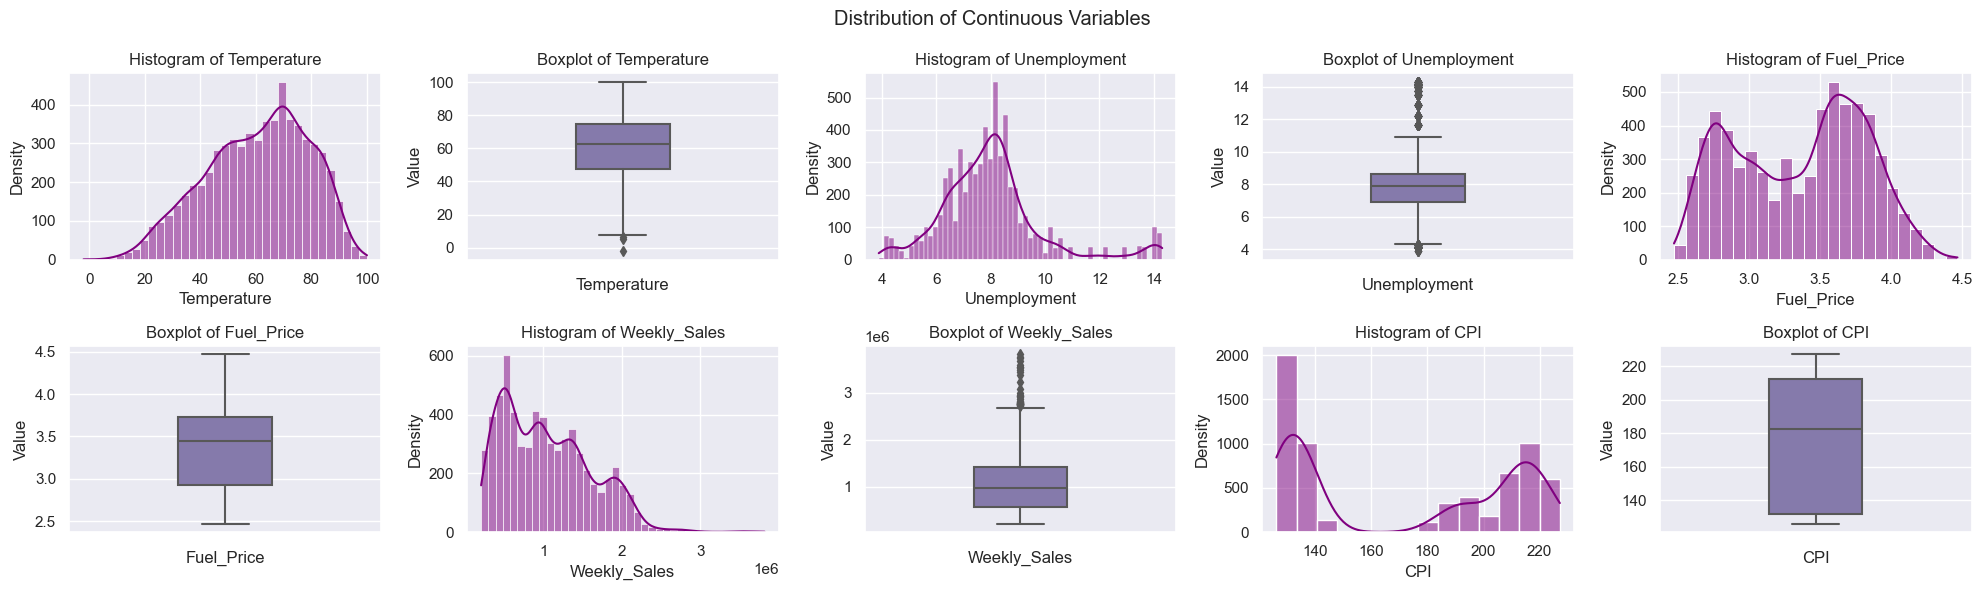

In [5]:
cont_vars = FEATURE_CONT.union({TARGET})
res_cont_vars = vars_dist(df=df, cont=True, ft_cont=cont_vars, subplots=[2,5], figsize=(20,6), output=True, fname='continuous_vars_dist.png', fpath='../doc')
res_cont_vars

Handling of Mising & Extreme Values

Features' Distribution

Features' Relationship w/ Target

Feature Engineering

Baseline Modeling

Improvement

In [2]:
delete_files(path=OUTPUT_PATH, exception=STATIC_FNAME)

Future Work

    1. Use distributed system tools for data loading, such as PySpark